In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("train_RNN_raw.csv")

In [4]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY
0,1,6,3,AA,11298.0,1100.0,-3.0
1,1,7,4,AA,11298.0,1100.0,-4.0
2,1,8,5,AA,11298.0,1100.0,-5.0
3,1,9,6,AA,11298.0,1100.0,2.0
4,1,10,7,AA,11298.0,1100.0,100.0


# clustering company

In [51]:
airports = df["ORIGIN_AIRPORT_ID"].value_counts()

In [56]:
bins = 150
range = (-30, 120)
nb_companies = len(airports.keys())

hist = []

In [57]:
nb_companies

311

In [58]:
plt.figure(figsize=(20,12))
for airport in airports.keys():
    a = df[df["ORIGIN_AIRPORT_ID"] == airport]["DEP_DELAY"].values
    hist.append(np.histogram(a, bins=bins, range=range, normed=True)[0])
#     plt.hist(a, bins=bins, range=range, density=True)
# plt.show()

In [60]:
hist

[array([  0.00000000e+00,   2.71215125e-06,   0.00000000e+00,
          2.71215125e-06,   0.00000000e+00,   0.00000000e+00,
          5.42430250e-06,   0.00000000e+00,   1.08486050e-05,
          1.35607563e-05,   8.13645375e-06,   3.25458150e-05,
          2.16972100e-05,   5.69551763e-05,   1.32895411e-04,
          2.35957159e-04,   3.03760940e-04,   5.12596586e-04,
          1.01434457e-03,   1.87952082e-03,   3.65326774e-03,
          6.11318892e-03,   1.09381060e-02,   1.87436773e-02,
          3.59685499e-02,   6.12403753e-02,   7.88503733e-02,
          1.13129253e-01,   1.38856720e-01,   1.18553555e-01,
          8.30921779e-02,   3.01265761e-02,   2.04686055e-02,
          1.72167361e-02,   1.53345032e-02,   1.38129863e-02,
          1.23565611e-02,   1.12038968e-02,   1.02844775e-02,
          9.87765486e-03,   9.06400948e-03,   7.99270974e-03,
          7.45299164e-03,   7.15736715e-03,   6.75868092e-03,
          6.33829747e-03,   5.75247280e-03,   5.25886128e-03,
        

In [61]:
X = np.array(hist)
X.shape

In [62]:
X.shape

(311, 150)

In [65]:
from sklearn.manifold import TSNE
from scipy.stats import entropy
from numpy.linalg import norm

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

X_embedded = TSNE(n_components=2, metric=JSD).fit_transform(X)

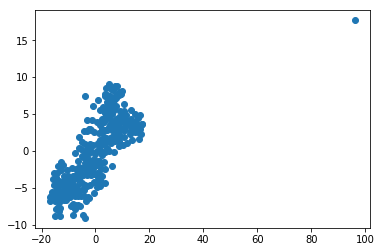

In [66]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()